In [1]:
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
bonesis.settings["parallel"] = 1 

# computing graph layout...


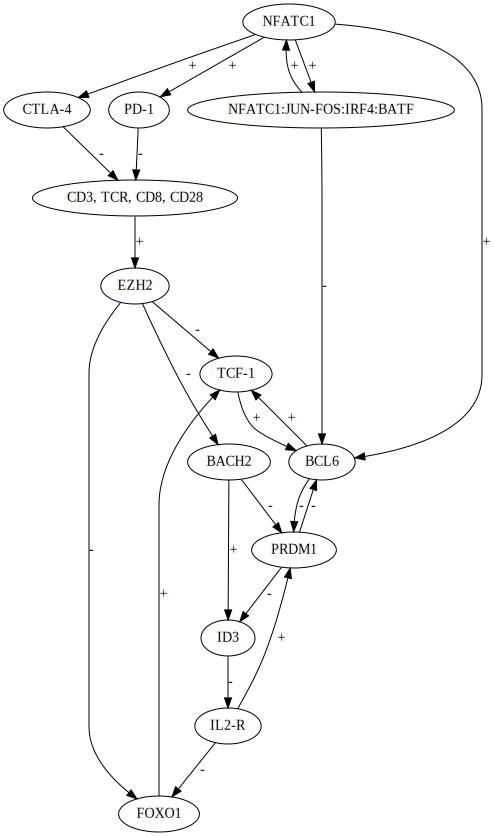

In [2]:
influences = [
("EZH2","TCF-1",dict(sign=-1)),
("EZH2","BACH2",dict(sign=-1)),
("EZH2","FOXO1",dict(sign=-1)),
("PRDM1","BCL6",dict(sign=-1)),
("PRDM1","ID3",dict(sign=-1)),
("BACH2","PRDM1",dict(sign=-1)),
("BACH2","ID3",dict(sign=1)),
("FOXO1","TCF-1",dict(sign=1)),
("ID3","IL2-R",dict(sign=-1)),
("BCL6","PRDM1",dict(sign=-1)),
("BCL6","TCF-1",dict(sign=1)),
("TCF-1","BCL6",dict(sign=1)),
("CD3, TCR, CD8, CD28","EZH2",dict(sign=1)),
("CTLA-4","CD3, TCR, CD8, CD28",dict(sign=-1)),
("IL2-R","PRDM1",dict(sign=1)),
("IL2-R","FOXO1",dict(sign=-1)),
("NFATC1:JUN-FOS:IRF4:BATF","NFATC1",dict(sign=1)),
("NFATC1:JUN-FOS:IRF4:BATF","BCL6",dict(sign=-1)),
("NFATC1","CTLA-4",dict(sign=1)),
("NFATC1","PD-1",dict(sign=1)),
("NFATC1","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=1)),
("NFATC1","BCL6",dict(sign=1)),
("PD-1","CD3, TCR, CD8, CD28",dict(sign=-1)),
]

bonesis_toy = bonesis.InfluenceGraph(influences)
bonesis_toy

In [3]:
#Mixture of dotplot and heatmap
observed_states={
    "zero": {"EZH2":0,"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"IL2-R":0,"NFATC1:JUN-FOS:IRF4:BATF":0,"NFATC1":0,"PD-1":0,"BTLA":0,"JUN-FOS":0,"NFKB1":0,"TBET-ZEB2":0,"PRDM1":0,"BACH2":0,"FOXO1":0,"ID3":0,"BCL6":0,"TCF-1":0,"IL12-R":0,"NFATC2":0},
    "trans":{"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"PD-1":0,"FOXO1":0,"IL12-R":0,"NFATC2":0,"JUN-FOS":0,"TBET-ZEB2":1},
    "mem": {"EZH2":0,"NFATC1":1,"NFKB1":1,"PRDM1":0,"BACH2":1,"NFATC2":0,"JUN-FOS":1,"TBET-ZEB2":0},
    "exh": {"EZH2":1,"CD3, TCR, CD8, CD28":1,"CTLA-4":1,"NFATC1":0,"PD-1":1,"NFKB1":0,"PRDM1":1,"FOXO1":1,"IL12-R":1,"NFATC2":1,"JUN-FOS":0},
}
pd.DataFrame.from_dict(observed_states, orient="index").fillna('')


#Has ~500k solutions!

,EZH2,"CD3, TCR, CD8, CD28",CTLA-4,IL2-R,NFATC1:JUN-FOS:IRF4:BATF,NFATC1,PD-1,BTLA,JUN-FOS,NFKB1,TBET-ZEB2,PRDM1,BACH2,FOXO1,ID3,BCL6,TCF-1,IL12-R,NFATC2
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mem,0.0,,,,,1.0,,,1,1.0,0.0,0.0,1.0,,,,,,0
exh,1.0,1.0,1.0,,,0.0,1.0,,0,0.0,,1.0,,1.0,,,,1.0,1
trans,,0.0,0.0,,,,0.0,,0,,1.0,,,0.0,,,,0.0,0


In [4]:
bo=bonesis.BoNesis(bonesis_toy, observed_states)

#bo.fixed(~bo.obs("exh"))
bo.fixed(~bo.obs("exh"))

~bo.obs("mem") >= ~bo.obs("trans") >= ~bo.obs("exh");

#~bo.obs("exh") >= ~bo.obs("mem")

#~bo.obs("zero") / ~bo.obs("mem")
#~bo.obs("zero") / ~bo.obs("trans")
~bo.obs("zero") / ~bo.obs("exh");

In [5]:
for bn in bo.boolean_networks(limit=1): # limit is optional
    print(bn)

Grounding...done in 0.1s
BACH2 <- !EZH2
BCL6 <- NFATC1|TCF-1
CD3, TCR, CD8, CD28 <- 1
CTLA-4 <- 1
EZH2 <- 1
FOXO1 <- 1
ID3 <- !PRDM1
IL2-R <- !ID3
NFATC1 <- 0
NFATC1:JUN-FOS:IRF4:BATF <- 1
PD-1 <- 1
PRDM1 <- 1
TCF-1 <- BCL6



In [ ]:
bo.all_fixpoints(bo.obs("exh"))

In [7]:
~bo.obs("mem") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [ ]:
#~bo.obs("trans") >> "fixpoints" ^ {bo.obs(obs) for obs in ["exh"]};

In [8]:
bo.boolean_networks().count()

Grounding...done in 0.1s


355806

In [6]:
solutions_2 = list(bo.boolean_networks())
pd.DataFrame(solutions_2)

Grounding...done in 0.1s


,BACH2,BCL6,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,FOXO1,ID3,IL2-R,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,PD-1,PRDM1,TCF-1
0,!EZH2,NFATC1|TCF-1,1,1,1,1,!PRDM1,!ID3,0,1,1,1,BCL6
1,!EZH2,NFATC1|TCF-1,1,1,1,1,!PRDM1,1,0,1,1,1,BCL6
2,!EZH2,NFATC1|TCF-1,1,1,1,1,!PRDM1,0,0,1,1,1,BCL6
3,!EZH2,NFATC1|TCF-1,1,1,"CD3, TCR, CD8, CD28",1,!PRDM1,0,0,1,1,1,BCL6
4,!EZH2,NFATC1|TCF-1,1,1,"CD3, TCR, CD8, CD28",1,!PRDM1,1,0,1,1,1,BCL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499975,0,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&!PR...,1,1,1,1,BACH2|!PRDM1,!ID3,0,0,1,IL2-R|(!BACH2&!BCL6),BCL6&FOXO1
499976,!EZH2,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&!PR...,1,1,"CD3, TCR, CD8, CD28",1,BACH2,!ID3,0,0,1,IL2-R|(!BACH2&!BCL6),BCL6&FOXO1
499977,!EZH2,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&!PR...,1,1,"CD3, TCR, CD8, CD28",1,BACH2|!PRDM1,!ID3,0,0,1,IL2-R|(!BACH2&!BCL6),BCL6&FOXO1
499978,0,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&!PR...,1,1,"CD3, TCR, CD8, CD28",1,BACH2,!ID3,0,0,1,IL2-R|(!BACH2&!BCL6),BCL6&FOXO1


In [7]:
projs = bo.local_functions()

Grounding...done in 0.0s


In [8]:
projs.as_dict(method="count")

{'EZH2': 2,
 'TCF-1': 3,
 'BACH2': 3,
 'FOXO1': 3,
 'PRDM1': 14,
 'BCL6': 31,
 'ID3': 6,
 'IL2-R': 3,
 'CD3, TCR, CD8, CD28': 1,
 'CTLA-4': 1,
 'NFATC1:JUN-FOS:IRF4:BATF': 3,
 'NFATC1': 2,
 'PD-1': 1}

In [ ]:
from functools import reduce
reduce(int.__mul__, _.values())

In [9]:
projs.as_dataframe()

,EZH2,TCF-1,BACH2,FOXO1,PRDM1,BCL6,ID3,IL2-R,"CD3, TCR, CD8, CD28",CTLA-4,NFATC1:JUN-FOS:IRF4:BATF,NFATC1,PD-1
0,1,(BCL6&!EZH2)|(BCL6&FOXO1),0,!EZH2|!IL2-R,!BACH2|!BCL6,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&TCF...,BACH2,0,1,1,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,1
1,"CD3, TCR, CD8, CD28",BCL6,1,!IL2-R,!BACH2,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&TCF...,BACH2|!PRDM1,1,,,0,0,
2,,BCL6&FOXO1,!EZH2,1,!BACH2|!BCL6|IL2-R,NFATC1|(!NFATC1:JUN-FOS:IRF4:BATF&TCF-1),BACH2&!PRDM1,!ID3,,,1,,
3,,,,,1,(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(!NFATC1:JU...,!PRDM1,,,,,,
4,,,,,!BACH2|IL2-R,NFATC1|TCF-1,1,,,,,,
5,,,,,!BACH2|(!BCL6&IL2-R),NFATC1|(!NFATC1:JUN-FOS:IRF4:BATF&TCF-1)|(!PRD...,0,,,,,,
6,,,,,(!BACH2&!BCL6)|(!BACH2&IL2-R),(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(!NFATC1:JU...,,,,,,,
7,,,,,(!BACH2&!BCL6)|(!BACH2&IL2-R)|(!BCL6&IL2-R),(NFATC1&!NFATC1:JUN-FOS:IRF4:BATF)|(NFATC1&!PR...,,,,,,,
8,,,,,!BCL6|IL2-R,(NFATC1&!PRDM1)|(!NFATC1:JUN-FOS:IRF4:BATF&TCF-1),,,,,,,
9,,,,,!BCL6|(!BACH2&IL2-R),(NFATC1&!PRDM1)|(!NFATC1:JUN-FOS:IRF4:BATF&TCF...,,,,,,,


In [ ]:
pd.DataFrame(solutions[75].attractors())